<a href="https://colab.research.google.com/github/noman-abdullah2000/Machine-learning-projects/blob/main/Project_Cardiovascular_prediction_with_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn

In [2]:
df=pd.read_csv("/content/drive/MyDrive/dataset/cardio_train.csv",sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().values.any()

False

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


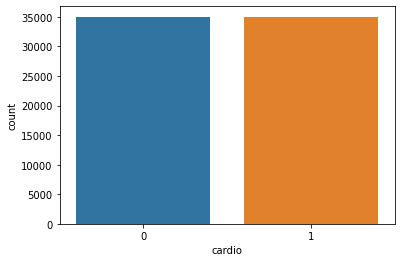

In [8]:
seaborn.countplot(df["cardio"])

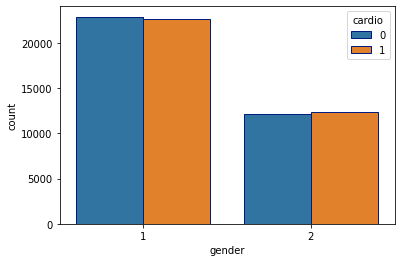

In [9]:
seaborn.countplot(x="gender",hue="cardio",data=df,edgecolor=seaborn.color_palette("dark",n_colors=1))

<BarContainer object of 2 artists>

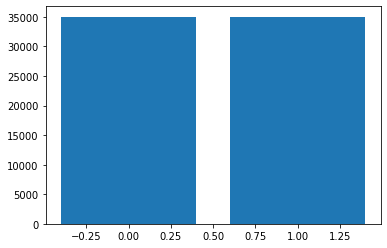

In [10]:
data=df["cardio"].value_counts()
name=data.index
count=data.values
plt.bar(name,count)

In [11]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [12]:
x=df.drop(["cardio","id"],axis=1)
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [13]:
y=df["cardio"]
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.2)

In [16]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
33939,21367,1,160,70.0,130,90,3,3,0,0,1
61733,21296,2,169,75.0,150,90,2,1,0,0,1
67507,17579,2,170,98.0,140,90,3,1,0,0,1
44888,21938,1,162,56.0,150,100,1,1,0,0,1
2389,20399,1,160,62.0,100,60,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
43521,17621,2,167,75.0,140,80,1,1,0,0,1
31162,19692,1,154,81.0,130,70,2,2,0,0,0
66044,19834,1,158,83.0,130,80,1,1,0,0,1
61218,22792,2,160,75.0,120,80,1,2,0,0,0


In [17]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
30475,23225,1,160,65.0,120,80,1,1,0,0,1
44993,21067,2,182,86.0,120,80,2,1,0,0,1
34621,21354,1,154,82.0,120,80,1,1,0,0,1
52016,18465,2,176,59.0,120,80,1,2,0,0,1
21991,20445,1,161,88.0,179,102,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49664,18749,2,156,70.0,140,90,2,1,0,0,1
58506,17454,1,153,71.0,90,60,1,1,0,0,1
46730,21770,1,156,64.0,140,80,2,1,0,0,1
23977,17676,2,180,72.0,110,70,1,1,0,0,0


In [18]:
y_train

33939    0
61733    1
67507    1
44888    1
2389     0
        ..
43521    1
31162    1
66044    0
61218    1
3665     0
Name: cardio, Length: 56000, dtype: int64

In [19]:
y_test

30475    1
44993    0
34621    1
52016    0
21991    1
        ..
49664    1
58506    0
46730    1
23977    0
11670    1
Name: cardio, Length: 14000, dtype: int64

In [41]:
from sklearn.ensemble import RandomForestClassifier
print("Model import Succesfully")

Model import Succesfully


In [21]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [22]:
print(f' Trainning Accuracy is {round(rfc.score(x_train,y_train)*100,2)}%')

 Trainning Accuracy is 99.98%


In [40]:
print(f' Test Accuracy is {round(rfc.score(x_test,y_test)*100,2)}%')

 Test Accuracy is 71.35%


In [45]:
rfc.predict([[16000,2,100,110.0,120,80,1,1,0,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knnc=KNeighborsClassifier(n_neighbors=5)

In [27]:
knnc.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
knnc.score(x_train,y_train)

0.7772857142857142

In [29]:
knnc.score(x_test,y_test)

0.6870714285714286

In [30]:
knnc.predict([[16027,2,173,110.0,120,80,1,1,0,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [31]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [32]:
lir=LinearRegression()

In [33]:
lir.fit(x_train,y_train)

LinearRegression()

In [34]:
lir.score(x_train,y_train)*100


12.145056726591086

In [42]:
lir.predict([[17395,1,154,79.0,120,80,2,2,0,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.55462285])

In [36]:
lor=LogisticRegression()

In [37]:
lor.fit(x_train,y_train)

LogisticRegression()

In [38]:
lor.score(x_train,y_train)

0.70725

In [39]:
lor.predict([[17395,1,154,79.0,120,80,2,2,0,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])